In [1]:
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import skimage as skm
from skimage import exposure

In [2]:
# Create path to the image file 
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\GIS\\torellneset_clipped_825.tif"

In [3]:
image = io.imread(image_path)

In [4]:
# Height, width, bands 
image.shape

(4170, 4410, 4)

In [5]:
with rasterio.open(image_path) as dataset:
    # Read Bands from the clipped image
    blue  = dataset.read(1)
    green = dataset.read(2)
    red   = dataset.read(3)
    NIR   = dataset.read(4)
    

In [6]:
cimag = NIR

In [7]:
cimag.shape

(4170, 4410)

In [8]:
row = cimag.shape[0]
col = cimag.shape[1]

In [9]:
X = cimag.reshape((row*col, 1))

In [10]:
X.shape

(18389700, 1)

In [22]:
X

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint16)

In [40]:
kmeans = KMeans(n_clusters=15, random_state=0, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=15, random_state=0)

In [41]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [42]:
cluster_centers

array([[ 1.89903995e+02],
       [-1.13136878e-09],
       [ 4.60529291e+01],
       [ 2.95283650e+02],
       [ 2.26666546e+02],
       [ 1.29837188e+02],
       [ 2.51493651e+02],
       [ 8.24161614e+01],
       [ 2.04533021e+02],
       [ 1.66515676e+02],
       [ 3.24808971e+02],
       [ 2.15793613e+02],
       [ 2.37953417e+02],
       [ 4.17504207e+01],
       [ 2.70176136e+02]])

In [43]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
clusterd_image= cluster_centers[cluster_labels].reshape(row, col)

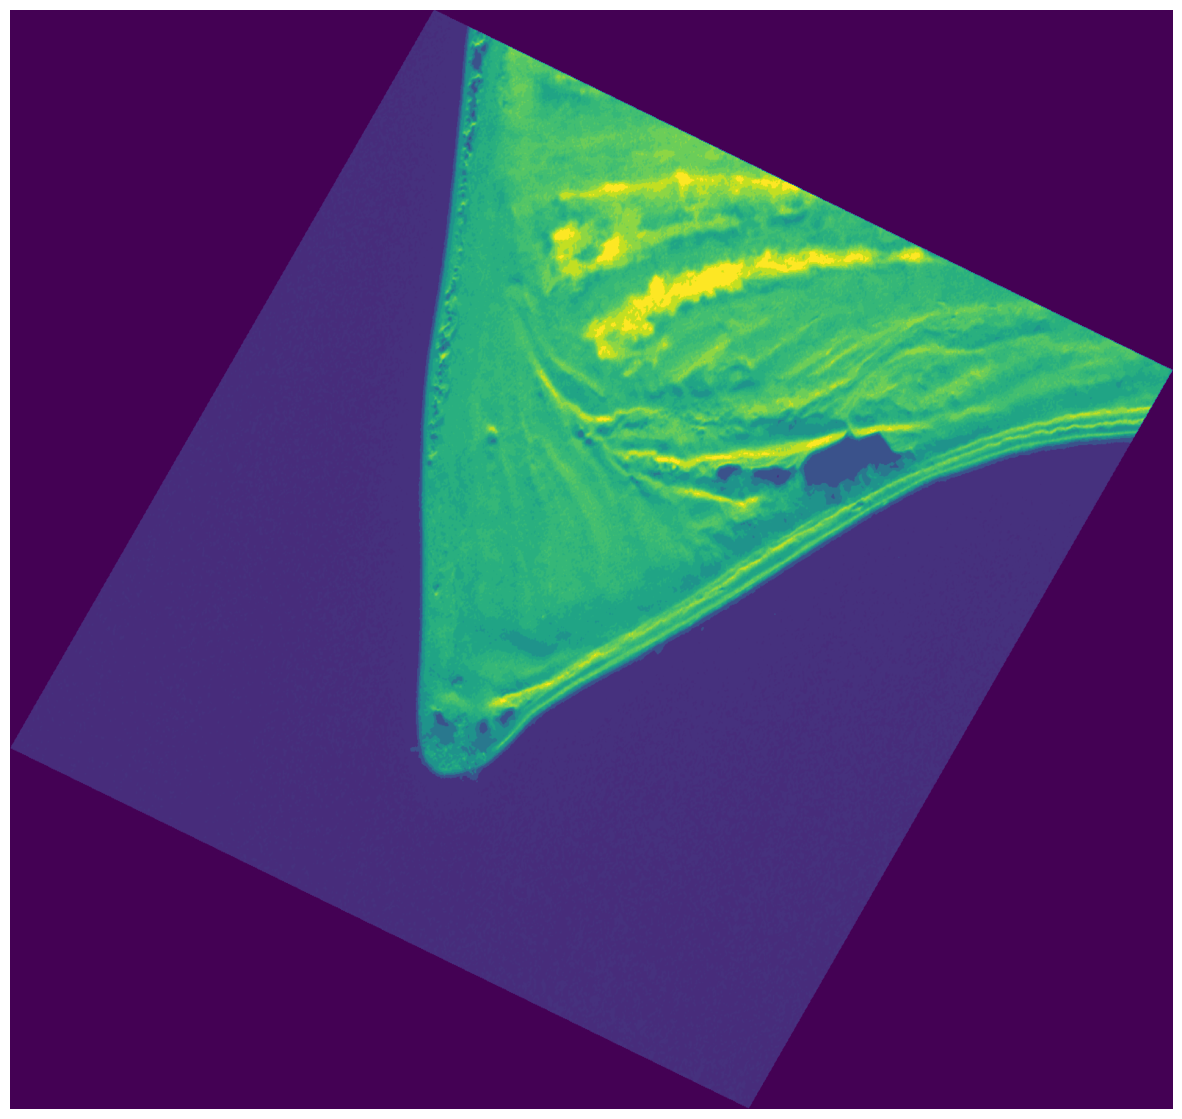

In [45]:
plt.figure(figsize=(15,15))
plt.imshow(clusterd_image)
plt.axis('off')
plt.show()

In [11]:
B1 = np.array(blue).astype(float)
B2 = np.array(green).astype(float)
B3 = np.array(red).astype(float)
B4 = np.array(NIR).astype(float)

In [12]:
NB4 = (B4-np.min(B4))/(np.max(B4)-np.min(B4))
NB3 = (B3-np.min(B3))/(np.max(B3)-np.min(B3))
NB2 = (B2-np.min(B2))/(np.max(B2)-np.min(B2))
NB1 = (B1-np.min(B1))/(np.max(B1)-np.min(B1))

In [13]:
Nstack = np.stack([NB4,NB3,NB2,NB1], axis=2)

In [15]:
adaptiveEnNB1 = exposure.equalize_adapthist(NB1 , clip_limit=0.08, nbins=256)
adaptiveEnNB2 = exposure.equalize_adapthist(NB2 , clip_limit=0.08, nbins=256)
adaptiveEnNB3 = exposure.equalize_adapthist(NB3 , clip_limit=0.08, nbins=256)
adaptiveEnNB4 = exposure.equalize_adapthist(NB4 , clip_limit=0.08, nbins=256)
adaptiveNstack = np.stack([adaptiveEnNB3,adaptiveEnNB2,adaptiveEnNB1], axis=2)

Text(0.5, 1.0, 'Histogram of adaptive RGB Image')

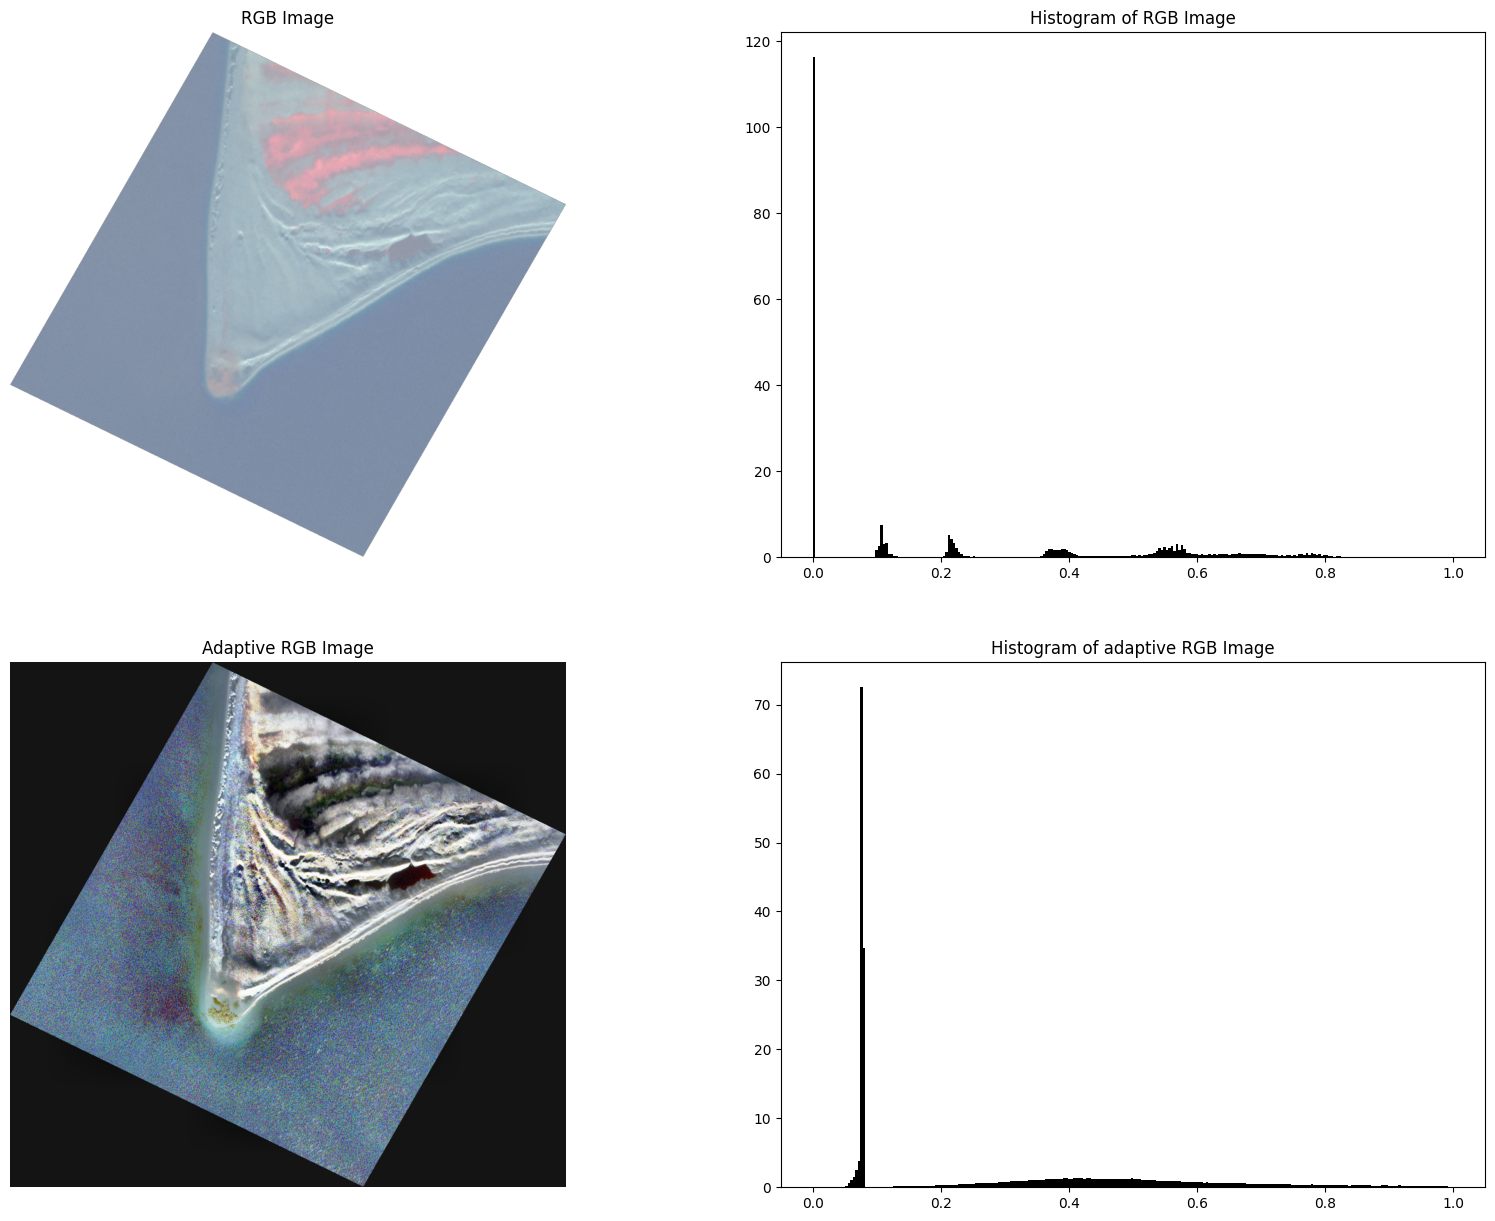

In [20]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax[0,0].imshow(Nstack)
ax[0,0].set_title('RGB Image')
ax[0,0].axis('off')
ax[0,1].hist(Nstack.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[0,1].ticklabel_format(style='plain')
ax[0,1].set_title('Histogram of RGB Image')
######################################################
ax[1,0].imshow(adaptiveNstack, cmap='gray')
ax[1,0].set_title('Adaptive RGB Image')
ax[1,0].axis('off')
ax[1,1].hist(adaptiveNstack.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[1,1].ticklabel_format(style='plain')
ax[1,1].set_title('Histogram of adaptive RGB Image')

In [21]:
image1 = adaptiveNstack

In [22]:
image1.shape

(4170, 4410, 3)

In [26]:

# Flatten the image
flattened_image = image1.reshape((4170, 4410 * 3))

# Display the shape of the flattened image
print("Shape of flattened image:", flattened_image.shape)


Shape of flattened image: (4170, 13230)


In [29]:
row = flattened_image.shape[0]
col = flattened_image.shape[1]

In [30]:
x1 = flattened_image.reshape((row*col, 1))

In [31]:
x1.shape

(55169100, 1)

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(x1)

C:\Users\Student\Documents\walrus_code\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Student\Documents\walrus_code\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=4, random_state=0)

In [33]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [34]:
cluster_centers

array([[0.81233099],
       [0.08213172],
       [0.3613289 ],
       [0.5550571 ]])

In [35]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1])

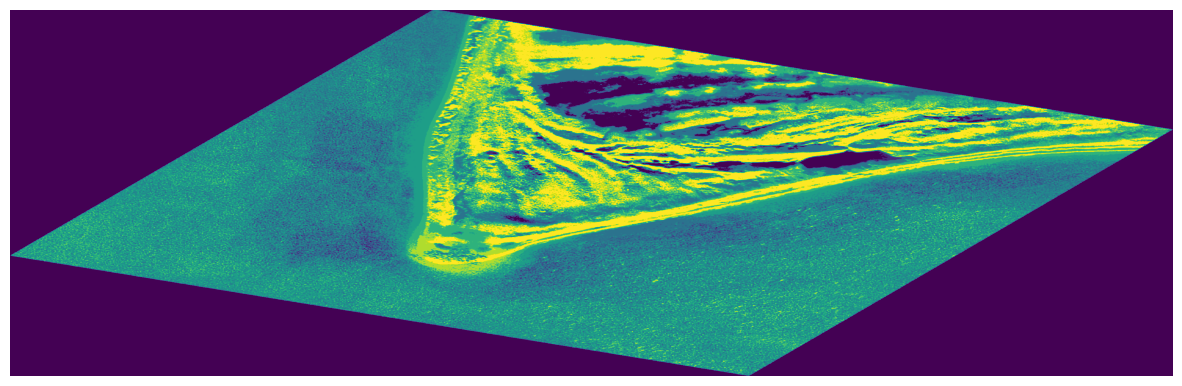

In [37]:
clusterd_image= cluster_centers[cluster_labels].reshape(row, col)
plt.figure(figsize=(15,15))
plt.imshow(clusterd_image)
plt.axis('off')
plt.show()

why is it squished? 

debug bug bug 

In [43]:
image2 = adaptiveNstack

In [44]:
image2.shape

(4170, 4410, 3)

In [48]:
# Read Bands from the array
blue  = image2[:, :, 0]
green = image2[:, :, 1]
red   = image2[:, :, 2]